## BUSINESS UNDERSTANDING

Overview
Kenya Power and Lighting Company (KPLC) often receives a high volume of tweets from customers reporting issues, asking questions, or providing feedback.Understanding customer sentiment towards KPLC is crucial to enable automating of responses, enhancing customer service efficiency, improving response times, and reduce the manual workload on customer service teams. The goal is to develop a chatbot capable of classifying various types of tweets and generating appropriate automated responses.


## Problem Statement
KPLC needs an automated sentiment analysis system to process and categorize customer feedback from social media, particularly X formerly (Twitter) where customers frequently express their sentiments regarding KPLC's services. By accurately classifying tweets related to KPLC’s services into sentiment categories the system will be able to identify issues by pinpointing common complaints and service issues and enhance customer feedback

### Objectives

* To gauge overall customer sentiment towards KPLC's services.·   

* To Identify specific issues mentioned in the tweets, such as token problems, power outages, billing issues, etc.

* To Create a chatbot that provides appropriate responses to customer inquiries


### Challenges
1. Data Collection and Preprocessing:
Gathering relevant tweets mentioning KPLC, especially when customers use various hashtags, misspellings or slang, can be difficult. Additionally, cleaning and preprocessing the data (e.g., removing noise like unrelated tweets, abbreviations) is crucial but time-consuming.

2. Sentiment Analysis Accuracy:
Accurately classifying the sentiment of tweets can be challenging due to the informal language, sarcasm, mixed sentiments and local dialects often used on X/Twitter.

3. Identifying Specific Issues:
Extracting and categorizing specific issues (e.g power outages, billing issues) mentioned in tweets can be complex due to the diverse ways in which customers describe their problems.

4. Real-time Data Processing:
Processing a continuous stream of tweets in real-time to provide timely insights and responses is demanding in terms of computational resources and model efficiency.

5. Handling Multilingual and Local Dialects:
Tweets may be in multiple languages or include local dialects, which can complicate sentiment analysis and issue detection. 
6. Evaluating Model Performance:
Ensuring the models perform well across different contexts, languages, and over time requires ongoing evaluation and tuning.




### Proposed Solution

* Use advanced Natural Language Processing (NLP) techniques and APIs (e.g., Twitter API) to collect and preprocess tweets.

* Implement data cleaning scripts to filter out irrelevant data and normalize the text for consistent analysis. 

* Train sentiment analysis models using machine learning techniques such as supervised learning with labeled datasets

* Implement a robust pipeline using tools for real-time data streaming and processing. Integrate with scalable cloud services such as AWS or Google Cloud to ensure the system can handle large volumes of data efficiently.

* Utilize existing chatbot frameworks like Rasa, integrated with the sentiment analysis and issue categorization models. This chatbot should be able to provide relevant responses based on the sentiment and identified issues and direct users to appropriate resources or support channels.

* Incorporate multilingual NLP models and fine-tune them with local dialect data. Using translation APIs where necessary to standardize inputs before analysis.

* Set up a continuous evaluation framework using A/B testing, cross-validation and performance metrics such as accuracy, F1-score and precision/recall. Regularly retrain models with new data to adapt to evolving customer language and sentiment.



### Metrics of success:

* Sentiment Accuracy: Percentage of correctly classified sentiments (positive, negative, neutral).

* Issue Detection Rate: Number of key issues identified and addressed based on sentiment analysis.


### Conclusion
The analysis of the tweets reveals that for Kenya Power and Lightning Company(KPLC),sentiment analysis of the tweets can o along way in assisting the company to understand and deal with customer feedback.In this way,KPLC will be able to focus on identifying the main problems developing and implementing corresponding strategies for the company’s service improvement and ultimately increasing the customer satisfaction level of their customers .The company will be able to maintain their brand image and identify the impending issues before they happen.

Despite the difficulties like dealing with  vast data and identification while analyzing the social media concerns ,performing sentiment analysis by analyzing tweets is effective.Since KLC has established key performance indicators of some of its goals such as raise in customer satisfaction scores and positive trend on brand sentiment,the company can use this tool to sustain its leadership in the energy sector while at the same time strengthening its relations with customers.


## DATA CLEANING

In [39]:
# Importing all the necessary Modules
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import glob
import pandas as pd
import re
import emoji
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from langdetect import detect
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\USER
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\USER
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\USER
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Merging all CSV files into one CSV file.

In [40]:
# Specify the path of CSV files
path = r'files'  # Replace with your actual path
all_files = glob.glob(os.path.join(path, "*.csv"))

# Read and combine all CSV files
df_list = [pd.read_csv(file) for file in all_files]
combined_df = pd.concat(df_list, ignore_index=True)

# Save the combined DataFrame to a new CSV file called kplc_df.csv
combined_df.to_csv('kplc_df.csv', index=False)


Now that we have merged all our csvs into one csv file called kplc_df, let us not look at the basic info of our data 

In [41]:
class DataInfo:
    def __init__(self, file_path):
        # Initialize by reading the CSV file into a DataFrame
        self.df = pd.read_csv(file_path)
    
    def get_shape(self):
        # Return the shape of the DataFrame
        shape = self.df.shape
        print(f"Shape of the DataFrame: {shape}")
        return shape
    
    def get_dtypes(self):
        # Return the data types of each column
        dtypes = self.df.dtypes
        print("Data types of each column:")
        print(dtypes)
        return dtypes
    
    def get_missing_values(self):
        # Return the number of missing values per column
        missing_values = self.df.isnull().sum()
        print("Missing values per feature:")
        print(missing_values)
        return missing_values
    
    def get_basic_info(self):
        # Print basic info including shape, data types, and missing values
        print("Basic Information:")
        self.get_shape()
        self.get_dtypes()
        self.get_missing_values()
    
    def remove_irrelevant_columns(self, columns_to_remove):
        # Remove only the columns that exist in the DataFrame
        existing_columns = [col for col in columns_to_remove if col in self.df.columns]
        self.df.drop(columns=existing_columns, inplace=True)
        print(f"Removed columns: {existing_columns}")
        print("Updated DataFrame:")
        print(self.df.head())
        return self.df
    
    def remove_duplicates(self):
        # Remove duplicate entries based on the 'post' column
        initial_shape = self.df.shape
        self.df.drop_duplicates(subset='Post', inplace=True)
        final_shape = self.df.shape
        print(f"Removed {initial_shape[0] - final_shape[0]} duplicate rows.")
        print(f"New shape of the DataFrame: {final_shape}")
        return self.df

# Instantiating our class
data_info = DataInfo("kplc_df.csv")

# Get basic information about the dataset
data_info.get_basic_info()

# Remove irrelevant columns
irrelevant_columns = ['Author', 'Likes', 'Reposts', 'Comments', 'Post Link', 'Profile Links', 'Views', 'Post Link', 'Profile Link', 'Post Body', 'Retweets', 'Tweet URL', 'Timestamp', 'Name', 'Media URL', 'Profile Lİnk']
cleaned_df = data_info.remove_irrelevant_columns(irrelevant_columns)

# Remove duplicates in the 'post' column
cleaned_df_no_duplicates = data_info.remove_duplicates()


Basic Information:
Shape of the DataFrame: (24774, 15)
Data types of each column:
Author           object
Handle           object
Post             object
Date             object
Likes           float64
Reposts         float64
Comments        float64
Post Link        object
Profile Link     object
Media URL        object
Views            object
Name             object
Retweets        float64
Tweet URL        object
Post Body        object
dtype: object
Missing values per feature:
Author            364
Handle              0
Post              326
Date                0
Likes           20997
Reposts         23305
Comments         9311
Post Link       14631
Profile Link    14305
Media URL       24750
Views           23572
Name            24448
Retweets        24763
Tweet URL       24448
Post Body       24448
dtype: int64
Removed columns: ['Author', 'Likes', 'Reposts', 'Comments', 'Post Link', 'Views', 'Post Link', 'Profile Link', 'Post Body', 'Retweets', 'Tweet URL', 'Name', 'Media URL']
Upd

Our kplc_df dataset has 15 features and some of the features have missing values like likes, Reposts and comments. We have opted for deletion of these columns since they are irrelevant

We also had different data Types such us floats and Objects. We then checked for duplicates and removed all the duplicated text on post columns

Let us again see how our data looks like and whether there is any missing values

In [42]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20725 entries, 0 to 24773
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Handle  20725 non-null  object
 1   Post    20724 non-null  object
 2   Date    20725 non-null  object
dtypes: object(3)
memory usage: 647.7+ KB


Amazing there are no null values

We can now proceed to the next stage where we are going to remove any emojis present in our dataset, remove punctuation, lowercase all the posts, remove any noise such as mentions and hashtags, filter-out non-english words, lemmitize and then tokenize our data

In [43]:
cleaned_df

,Handle,Post,Date
0,@oleykan69,@KenyaPower_Care how long does it take to rest...,29-Apr
1,@kak_yeah,"Your transformer vihiga county, sabatia subcou...",29-Apr
2,@Woud_Nyathira,No light for 28days now and your service men w...,29-Apr
3,@ellemanani,@KenyaPower_Care it’s been 26+ hours without p...,29-Apr
4,@Smithkmn,When will you guys ever think of doing a phase...,29-Apr
...,...,...,...
24757,@danielkariukik,We do not have power in Kambui Girls high scho...,19-Jan
24770,@YawenSuzume,No power in some places in Kenyatta market,12-Jan
24771,@Damakola,@KenyaPower 22164958 no power since yesterday,12-Jan
24772,@kxxbos,@KenyaPower your frequent power outages have c...,3-Feb


In [44]:
import pandas as pd
import re
import numpy as np

def remove_pattern(text, pattern_regex):
    if isinstance(text, str):
        return re.sub(pattern_regex, '', text)
    else:
        return text

# Ensure 'Post' column is processed correctly
cleaned_df['Post'] = cleaned_df['Post'].apply(lambda x: remove_pattern(x, r"@[\w]*"))

# Display the first 10 rows to check the results
print(cleaned_df.head(10))


             Handle                                               Post    Date
0        @oleykan69   how long does it take to restore a transforme...  29-Apr
1         @kak_yeah  Your transformer vihiga county, sabatia subcou...  29-Apr
2    @Woud_Nyathira  No light for 28days now and your service men w...  29-Apr
3       @ellemanani   it’s been 26+ hours without power. Transforme...  29-Apr
4         @Smithkmn  When will you guys ever think of doing a phase...  29-Apr
5    @CynthiaMatere  What. Who can go near transformer where live w...  29-Apr
6  @CliffOsoro92176  What's wrong with ruai  block 10 transformer.....  29-Apr
7      @julietdotts   \r\nHallo.Good evening!\r\nNo power.\r\nAccou...  29-Apr
8       @shherryyzz   A transformer has burst into a flame at the e...  29-Apr
9        @maerowaka  Issue has been in your offices hundreds of tim...  29-Apr


In [60]:
cleaned_df

,Handle,Post,Date,Vader_sentiment_score,Vader_sentiment_label,TextBlob_Sentiment,transformer,bill,blackout,interruption,meter,connection,tokens,service,restored,delayed,power,stima
0,@oleykan69,long take restore transformer damaged vandalis...,29-Apr,0.6124,positive,Positive,True,False,False,False,False,False,False,False,False,False,True,False
1,@kak_yeah,transformer vihiga county sabatia subcountysab...,29-Apr,0.0772,positive,Positive,True,False,False,False,False,False,False,False,False,False,False,False
2,@Woud_Nyathira,light days service men want bribed ksh k resto...,29-Apr,0.7096,positive,Positive,True,False,False,False,False,False,False,True,False,False,False,False
3,@ellemanani,hours without power transformer blew last nigh...,29-Apr,0.0000,neutral,Neutral,True,False,False,False,False,False,False,False,False,False,True,False
4,@Smithkmn,guys ever think phase balancing transformer ga...,29-Apr,0.4939,positive,Positive,True,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24757,@danielkariukik,power kambui girls high school since hrs,19-Jan,0.0000,neutral,Positive,False,False,False,False,False,False,False,False,False,False,True,False
24770,@YawenSuzume,power places kenyatta market,12-Jan,0.0000,neutral,Neutral,False,False,False,False,False,False,False,False,False,False,True,False
24771,@Damakola,power since yesterday,12-Jan,0.0000,neutral,Neutral,False,False,False,False,False,False,False,False,False,False,True,False
24772,@kxxbos,frequent power outages cost household applianc...,3-Feb,0.0000,neutral,Positive,False,False,False,False,False,False,False,False,False,False,True,False


In [46]:
import pandas as pd
import re
import emoji
from nltk.corpus import stopwords

class TextCleaner:
    def __init__(self, df, text_column):
        """
        Initialize the TextCleaner class with a DataFrame and the text column to clean.
        
        :param df: DataFrame containing the data
        :param text_column: The name of the column to clean
        """
        self.df = df
        self.text_column = text_column
        self.stop_words = set(stopwords.words('english'))
    
    def remove_pattern(self, text, pattern_regex):
        """Remove a specific pattern from the text."""
        return re.sub(pattern_regex, '', text)

    def handle_emojis(self, text):
        """Replace emojis with corresponding text descriptions."""
        return emoji.demojize(text, delimiters=(" ", " "))
    
    def to_lowercase(self, text):
        """Convert text to lowercase."""
        return text.lower()
    
    def remove_punctuation_numbers(self, text):
        """Remove punctuation and numbers from the text."""
        return re.sub(r'[^a-zA-Z\s]', '', text)
    
    def remove_mentions_hashtags(self, text):
        """Remove mentions (@) and hashtags (#) along with any attached words."""
        text = self.remove_pattern(text, r'@\w+')
        text = self.remove_pattern(text, r'#\w+')
        return text
    
    def remove_stopwords(self, text):
        """Remove stopwords from the text."""
        return ' '.join(word for word in text.split() if word not in self.stop_words)
    
    def clean_single_text(self, text):
        """Clean a single piece of text by applying all steps."""
        if pd.isna(text):
            return ''
        text = self.handle_emojis(text)
        text = self.to_lowercase(text)
        text = self.remove_punctuation_numbers(text)
        text = self.remove_mentions_hashtags(text)
        text = self.remove_stopwords(text)
        return text
    
    def clean_text(self):
        """Apply all cleaning steps to the specified text column in the DataFrame."""
        self.df[self.text_column] = self.df[self.text_column].apply(lambda text: self.clean_single_text(text))
        return self.df




# Instantiate our TextCleaner Class
text_cleaner = TextCleaner(cleaned_df, text_column='Post')
cleaned_df = text_cleaner.clean_text()
cleaned_df.to_csv('final_cleaned_kplc_df.csv', index=False)
print(cleaned_df.head())


           Handle                                               Post    Date
0      @oleykan69  long take restore transformer damaged vandalis...  29-Apr
1       @kak_yeah  transformer vihiga county sabatia subcountysab...  29-Apr
2  @Woud_Nyathira  light days service men want bribed ksh k resto...  29-Apr
3     @ellemanani  hours without power transformer blew last nigh...  29-Apr
4       @Smithkmn  guys ever think phase balancing transformer ga...  29-Apr


## Sentiment Analysis and Text Preprocessing.

This analysis will help us understand the general sentiment towards KPLC's services and identify the key issues that are being mentioned. By looking at the sentiment associated with specific keywords, we can gain insights into which aspects of the service are causing the most dissatisfaction (or satisfaction) among users.

In [47]:
cleaned_df

,Handle,Post,Date
0,@oleykan69,long take restore transformer damaged vandalis...,29-Apr
1,@kak_yeah,transformer vihiga county sabatia subcountysab...,29-Apr
2,@Woud_Nyathira,light days service men want bribed ksh k resto...,29-Apr
3,@ellemanani,hours without power transformer blew last nigh...,29-Apr
4,@Smithkmn,guys ever think phase balancing transformer ga...,29-Apr
...,...,...,...
24757,@danielkariukik,power kambui girls high school since hrs,19-Jan
24770,@YawenSuzume,power places kenyatta market,12-Jan
24771,@Damakola,power since yesterday,12-Jan
24772,@kxxbos,frequent power outages cost household applianc...,3-Feb


Sentiment Analysis Method choosem was **VADER** (Valence Aware Dictionary for sEntiment Reasoning). This is beacuse it is particularly suited for social media text due to its ability to understand the context of language used online.

In [48]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()
# Apply sentiment analysis to each tweet
cleaned_df['Vader_sentiment_score'] = cleaned_df['Post'].apply(lambda post: sid.polarity_scores(post)['compound'])

# Classify the sentiment
cleaned_df['Vader_sentiment_label'] = cleaned_df['Vader_sentiment_score'].apply(lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral'))

[nltk_data] Downloading package vader_lexicon to C:\Users\USER
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


This calculates the sentiment score for each tweet and classifies it as positive, negative, or neutral.

In [49]:
cleaned_df

,Handle,Post,Date,Vader_sentiment_score,Vader_sentiment_label
0,@oleykan69,long take restore transformer damaged vandalis...,29-Apr,0.6124,positive
1,@kak_yeah,transformer vihiga county sabatia subcountysab...,29-Apr,0.0772,positive
2,@Woud_Nyathira,light days service men want bribed ksh k resto...,29-Apr,0.7096,positive
3,@ellemanani,hours without power transformer blew last nigh...,29-Apr,0.0000,neutral
4,@Smithkmn,guys ever think phase balancing transformer ga...,29-Apr,0.4939,positive
...,...,...,...,...,...
24757,@danielkariukik,power kambui girls high school since hrs,19-Jan,0.0000,neutral
24770,@YawenSuzume,power places kenyatta market,12-Jan,0.0000,neutral
24771,@Damakola,power since yesterday,12-Jan,0.0000,neutral
24772,@kxxbos,frequent power outages cost household applianc...,3-Feb,0.0000,neutral


Sentiment Analysis Using **TextBlob**. It is another tool that can be used for sentiment analysis, and it provides polarity (positive/negative) and subjectivity (objective/subjective) scores.

In [50]:
from textblob import TextBlob

def analyze_sentiment_textblob(text):
    analysis = TextBlob(text)
    
    # Determine sentiment label
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment analysis
cleaned_df['TextBlob_Sentiment'] = cleaned_df['Post'].apply(analyze_sentiment_textblob)


Compairing the two methods of sentiment analysis, vander and one using textblob.

In [51]:
cleaned_df.head(20)

,Handle,Post,Date,Vader_sentiment_score,Vader_sentiment_label,TextBlob_Sentiment
0,@oleykan69,long take restore transformer damaged vandalis...,29-Apr,0.6124,positive,Positive
1,@kak_yeah,transformer vihiga county sabatia subcountysab...,29-Apr,0.0772,positive,Positive
2,@Woud_Nyathira,light days service men want bribed ksh k resto...,29-Apr,0.7096,positive,Positive
3,@ellemanani,hours without power transformer blew last nigh...,29-Apr,0.0000,neutral,Neutral
4,@Smithkmn,guys ever think phase balancing transformer ga...,29-Apr,0.4939,positive,Positive
5,@CynthiaMatere,go near transformer live wire concerned absurd...,29-Apr,-0.2500,negative,Negative
6,@CliffOsoro92176,whats wrong ruai block transformerno power,29-Apr,-0.7184,negative,Negative
7,@julietdotts,hallogood evening power account please took tr...,29-Apr,0.4215,positive,Neutral
8,@shherryyzz,transformer burst flame entrance theta hotel k...,29-Apr,0.4939,positive,Positive
9,@maerowaka,issue offices hundreds time times transformer ...,29-Apr,0.0000,neutral,Neutral


### Keyword Categorization
To categorize tweets based on specific keywords like "Transformer", "Blackout", etc. We created columns for each keyword and marked the rows that mention them:

In [52]:
keywords = ['transformer', 'bill', 'blackout', 'interruption', 'meter', 'connection', 'tokens', 'service', 'restored', 'delayed', 'power', 'stima']

# Create columns for each keyword
for keyword in keywords:
    cleaned_df[keyword] = cleaned_df['Post'].str.contains(keyword, case=False, na=False)


In [53]:
cleaned_df

,Handle,Post,Date,Vader_sentiment_score,Vader_sentiment_label,TextBlob_Sentiment,transformer,bill,blackout,interruption,meter,connection,tokens,service,restored,delayed,power,stima
0,@oleykan69,long take restore transformer damaged vandalis...,29-Apr,0.6124,positive,Positive,True,False,False,False,False,False,False,False,False,False,True,False
1,@kak_yeah,transformer vihiga county sabatia subcountysab...,29-Apr,0.0772,positive,Positive,True,False,False,False,False,False,False,False,False,False,False,False
2,@Woud_Nyathira,light days service men want bribed ksh k resto...,29-Apr,0.7096,positive,Positive,True,False,False,False,False,False,False,True,False,False,False,False
3,@ellemanani,hours without power transformer blew last nigh...,29-Apr,0.0000,neutral,Neutral,True,False,False,False,False,False,False,False,False,False,True,False
4,@Smithkmn,guys ever think phase balancing transformer ga...,29-Apr,0.4939,positive,Positive,True,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24757,@danielkariukik,power kambui girls high school since hrs,19-Jan,0.0000,neutral,Positive,False,False,False,False,False,False,False,False,False,False,True,False
24770,@YawenSuzume,power places kenyatta market,12-Jan,0.0000,neutral,Neutral,False,False,False,False,False,False,False,False,False,False,True,False
24771,@Damakola,power since yesterday,12-Jan,0.0000,neutral,Neutral,False,False,False,False,False,False,False,False,False,False,True,False
24772,@kxxbos,frequent power outages cost household applianc...,3-Feb,0.0000,neutral,Positive,False,False,False,False,False,False,False,False,False,False,True,False


Ploting for both methods:

In [54]:
# Overall sentiment distribution
sentiment_distribution = cleaned_df['Vader_sentiment_label'].value_counts()
print("Sentiment Distribution:\n", sentiment_distribution)

Sentiment Distribution:
 Vader_sentiment_label
positive    9011
negative    6932
neutral     4782
Name: count, dtype: int64


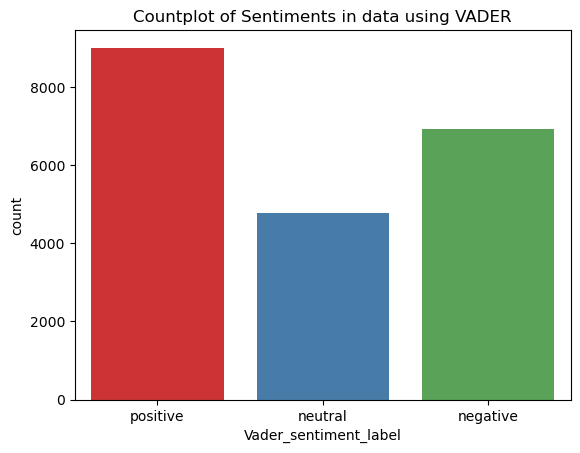

<Figure size 1000x1000 with 0 Axes>

In [55]:
# Displaying the sentiments on a countplot

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x = 'Vader_sentiment_label',data = cleaned_df,palette='Set1' )
plt.title('Countplot of Sentiments in data using VADER')
plt.figure(figsize=(10,10),dpi=100)
plt.show()


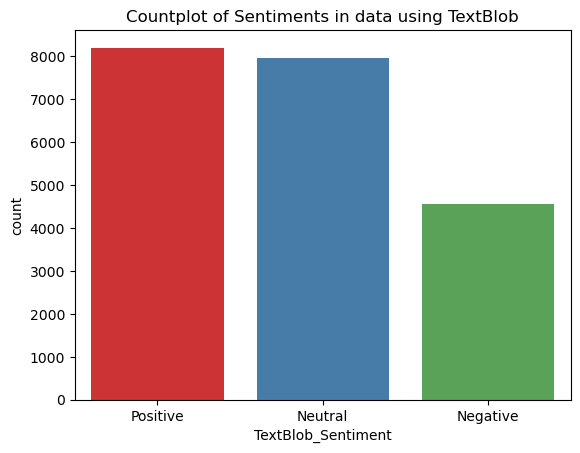

<Figure size 1000x1000 with 0 Axes>

In [56]:
sns.countplot(x = 'TextBlob_Sentiment',data = cleaned_df,palette='Set1' )
plt.title('Countplot of Sentiments in data using TextBlob')
plt.figure(figsize=(10,10),dpi=100)
plt.show()


We decided to go with the VADER Sentiment Analysis method since it is more suitable to social media data like tweets.
As shown, Kenya power customer care account in X platform (KenyaPower_Care), receives more positive posts than neutral and negative. Positive posts are 9011, negative posts are 6932, and neutral posts are 4782.

Plotting to view the frequency of keywords choosen that are in the posts, that is: 'transformer', 'bill', 'blackout', 'interruption', 'meter', 
                   'connection', 'tokens', 'service', 'restored', 'delayed', 'power' and 'stima'.


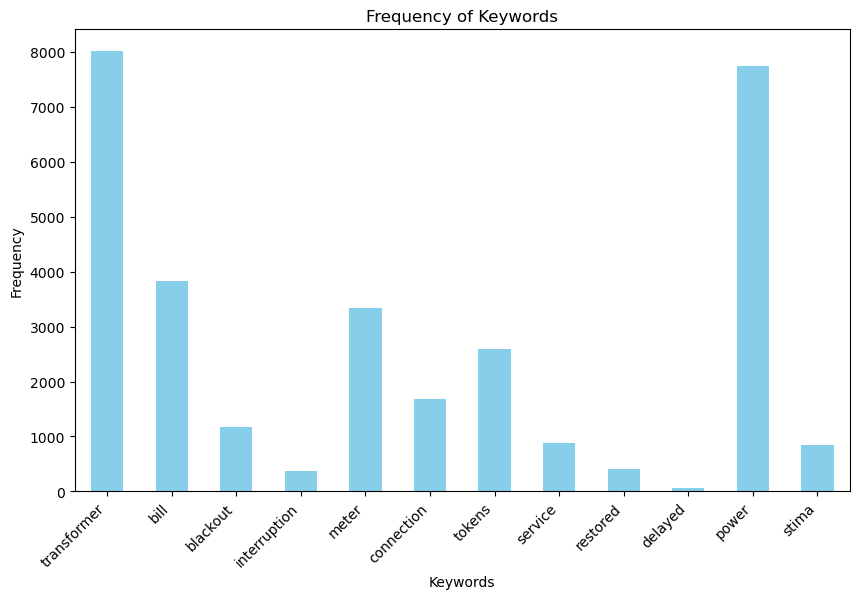

In [57]:
# Assuming your DataFrame is named df
columns_to_plot = ['transformer', 'bill', 'blackout', 'interruption', 'meter', 
                   'connection', 'tokens', 'service', 'restored', 'delayed', 'power', 'stima']


# Calculate the frequency of each keyword
frequency = cleaned_df[columns_to_plot].sum()

# Plotting the frequency
plt.figure(figsize=(10, 6))
frequency.plot(kind='bar', color='skyblue')
plt.title('Frequency of Keywords')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

Stima is not frequently mentioned in posts since we scrapped mostly posts in the English language. The Two most mentioned keywords are 'transformers' at over 8000 and 'power' a over 7500. This is followed by keywords 'bill', 'meter' then 'tokens'. The least mentioned keyword is 'delayed'.
This will be considered during modelling.

In [58]:
frequency

transformer     8001
bill            3831
blackout        1179
interruption     369
meter           3331
connection      1674
tokens          2599
service          885
restored         401
delayed           72
power           7746
stima            847
dtype: int64

### Preparing data

This will involve the following:

Tokenization: Breaking down the text into individual words, called tokens.

Lemmatization: Similar to stemming but more sophisticated, converting words to their canonical form based on context such as "better" to "good".

In [61]:
#dropping columns 
processed_df = cleaned_df.drop(['transformer', 'bill', 'blackout', 'interruption', 'meter', 
                   'connection', 'tokens', 'service', 'restored', 'delayed', 'power', 'stima', 'Handle','Date',	'Vader_sentiment_score','TextBlob_Sentiment'],axis=1)

In [62]:
processed_df.head() 

,Post,Vader_sentiment_label
0,long take restore transformer damaged vandalis...,positive
1,transformer vihiga county sabatia subcountysab...,positive
2,light days service men want bribed ksh k resto...,positive
3,hours without power transformer blew last nigh...,neutral
4,guys ever think phase balancing transformer ga...,positive


In [63]:
# Tokenize the text in the 'Post' column
processed_df['tokens'] = processed_df['Post'].apply(word_tokenize)

processed_df


,Post,Vader_sentiment_label,tokens
0,long take restore transformer damaged vandalis...,positive,"[long, take, restore, transformer, damaged, va..."
1,transformer vihiga county sabatia subcountysab...,positive,"[transformer, vihiga, county, sabatia, subcoun..."
2,light days service men want bribed ksh k resto...,positive,"[light, days, service, men, want, bribed, ksh,..."
3,hours without power transformer blew last nigh...,neutral,"[hours, without, power, transformer, blew, las..."
4,guys ever think phase balancing transformer ga...,positive,"[guys, ever, think, phase, balancing, transfor..."
...,...,...,...
24757,power kambui girls high school since hrs,neutral,"[power, kambui, girls, high, school, since, hrs]"
24770,power places kenyatta market,neutral,"[power, places, kenyatta, market]"
24771,power since yesterday,neutral,"[power, since, yesterday]"
24772,frequent power outages cost household applianc...,neutral,"[frequent, power, outages, cost, household, ap..."


The lemmatizer is used to reduce words to their base form.

The wordnet POS tags are used to determine the appropriate WordNet POS tag for each token. This ensures that the lemmatizer can correctly identify and lemmatize nouns, verbs, adjectives and adverbs.

The get_wordnet_pos function ensures that words are lemmatized correctly based on their POS in the sentence. The lemmatization process is applied to each token in the tweets, resulting in a more standardized text that is easier to analyze and model.

In [68]:
from nltk.corpus import wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\USER
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [70]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to convert NLTK POS tags to WordNet POS tags
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# Lemmatize the tokens
processed_df['lemmatized'] = processed_df['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens])

In [71]:
processed_df

,Post,Vader_sentiment_label,tokens,lemmatized
0,long take restore transformer damaged vandalis...,positive,"[long, take, restore, transformer, damaged, va...","[long, take, restore, transformer, damage, van..."
1,transformer vihiga county sabatia subcountysab...,positive,"[transformer, vihiga, county, sabatia, subcoun...","[transformer, vihiga, county, sabatia, subcoun..."
2,light days service men want bribed ksh k resto...,positive,"[light, days, service, men, want, bribed, ksh,...","[light, day, service, men, want, bribed, ksh, ..."
3,hours without power transformer blew last nigh...,neutral,"[hours, without, power, transformer, blew, las...","[hour, without, power, transformer, blew, last..."
4,guys ever think phase balancing transformer ga...,positive,"[guys, ever, think, phase, balancing, transfor...","[guy, ever, think, phase, balance, transformer..."
...,...,...,...,...
24757,power kambui girls high school since hrs,neutral,"[power, kambui, girls, high, school, since, hrs]","[power, kambui, girl, high, school, since, hr]"
24770,power places kenyatta market,neutral,"[power, places, kenyatta, market]","[power, place, kenyatta, market]"
24771,power since yesterday,neutral,"[power, since, yesterday]","[power, since, yesterday]"
24772,frequent power outages cost household applianc...,neutral,"[frequent, power, outages, cost, household, ap...","[frequent, power, outage, cost, household, app..."


### Story Generation and Visualization

This function visualizes the most common words according to polarity related to KPLC.

This will get word clouds for negative, neutral and positive tweets, helping us understand the different sentiments expressed in the tweets about KPLC's services.


In [75]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, 
                          relative_scaling=0.5, colormap='Dark2').generate(all_words)
    
    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()



Most common words in positive tweets

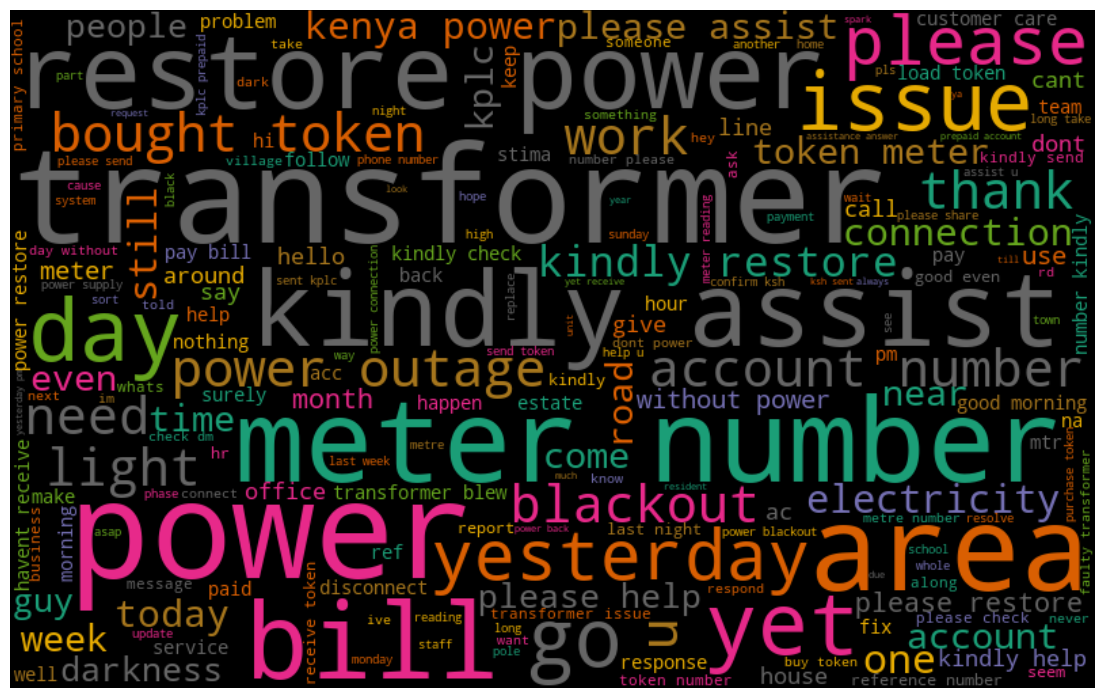

In [76]:
# Generate word cloud for positive tweets
all_words = ' '.join([' '.join(text) for text in processed_df['lemmatized'][processed_df['Vader_sentiment_label'] == 'positive']])
generate_wordcloud(all_words)

Generating and displaying a word cloud for the most common w.ords in tweets labelled as negative.

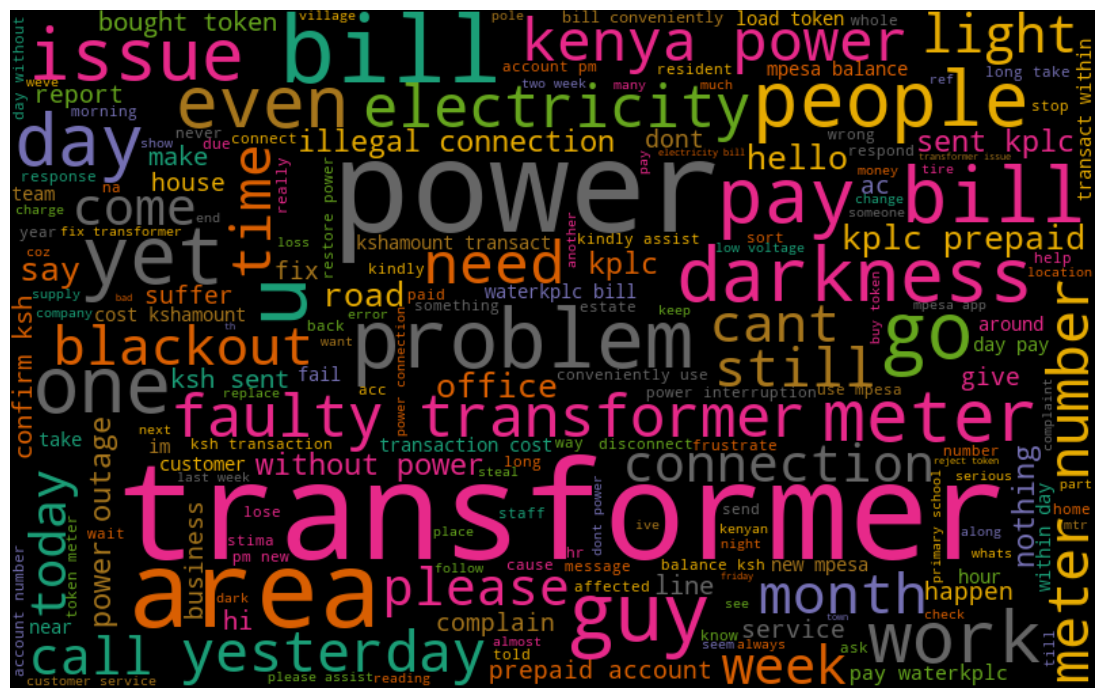

In [77]:
# Generate word cloud for negative tweets
all_words_negative = ' '.join([' '.join(text) for text in processed_df['lemmatized'][processed_df['Vader_sentiment_label'] == 'negative']])
generate_wordcloud(all_words_negative)

Generating and displaying a word cloud for the most common w.ords in tweets labelled as neutral.

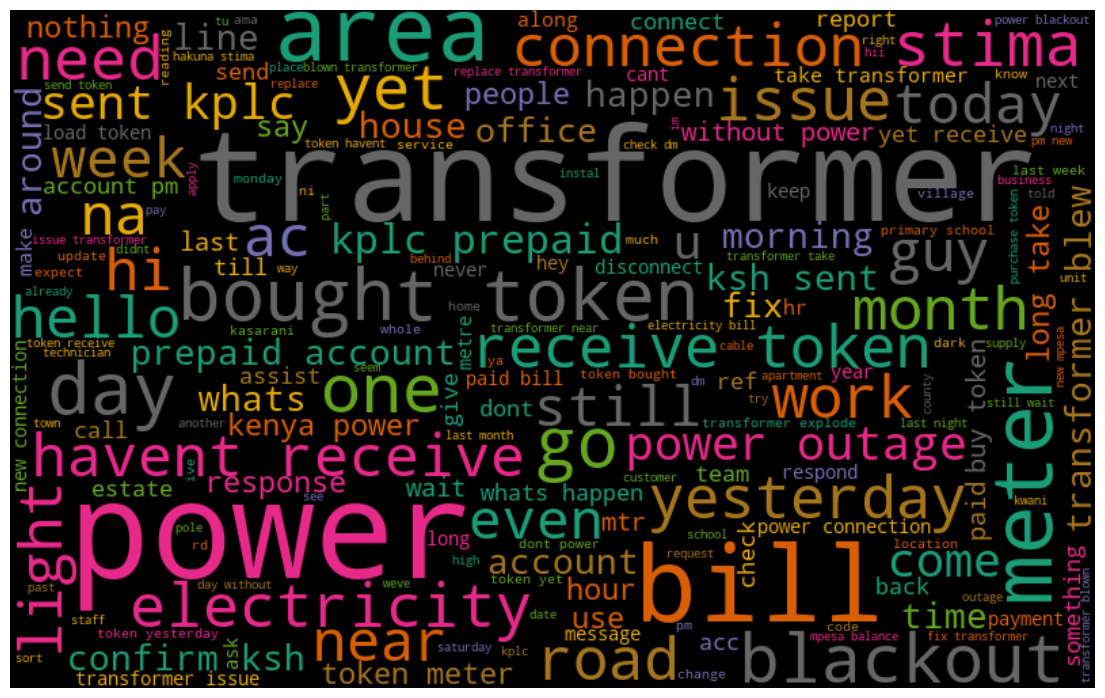

In [78]:
# Generate word cloud for neutral tweets
all_words_neutral = ' '.join([' '.join(text) for text in  processed_df['lemmatized'][processed_df['Vader_sentiment_label'] == 'neutral']])
generate_wordcloud(all_words_neutral)

### Vectorization

 Vectorizing the data, we transforming the text data into a numerical format that can be used for further machine learning tasks.

We can choose between CountVectorizer or TfidfVectorizer vectorizing methods, depending on whether we want to use term frequency (count) or term frequency-inverse document frequency (TF-IDF) for vectorization. We did both.

CountVectorizer

This converts the text data into a matrix of token counts. It's useful when you want to use the raw frequency of words in your analysis.

In [79]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [81]:
# Initialize CountVectorizer
count_vectorizer = CountVectorizer()

# Vectorize the lemmatized column
X_count = count_vectorizer.fit_transform(processed_df['lemmatized'].apply(lambda x: ' '.join(x)))

# Convert to DataFrame for easier interpretation
count_df = pd.DataFrame(X_count.toarray(), columns=count_vectorizer.get_feature_names_out())

print(count_df.head())

   aa  aaaaagh  aaai  aaii  aalllwwayyyzz  ab  abadare  abala  abandon  \
0   0        0     0     0              0   0        0      0        0   
1   0        0     0     0              0   0        0      0        0   
2   0        0     0     0              0   0        0      0        0   
3   0        0     0     0              0   0        0      0        0   
4   0        0     0     0              0   0        0      0        0   

   abardare  ...  znaingia  znapanda  zombie  zone  zoom  zoomteams  zooooote  \
0         0  ...         0         0       0     0     0          0         0   
1         0  ...         0         0       0     0     0          0         0   
2         0  ...         0         0       0     0     0          0         0   
3         0  ...         0         0       0     0     0          0         0   
4         0  ...         0         0       0     0     0          0         0   

   zote  zungusha  zuri  
0     0         0     0  
1     0         

For a CountVectorizer, each word in your corpus (the text data)  becomes a column in the matrix and each row corresponds to a document (a tweet in your case). The numbers in the matrix represent the frequency of the corresponding word in each tweet.

This matrix can now be used as input for further analysis or machine learning models. The high number of columns (19,747) indicates that we have a large vocabulary, which is expected given the diverse language used in social media posts.

TfidfVectorizer

This converts the text data into a matrix of TF-IDF features. It's useful when you want to account for the importance of words across different documents, reducing the weight of commonly occurring words.

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Limit the number of features to, for example, 5000 most common words
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(processed_df['lemmatized'].apply(lambda x: ' '.join(x)))

# Convert the sparse matrix to a sparse DataFrame
sparse_tfidf = pd.DataFrame.sparse.from_spmatrix(X_tfidf, columns=tfidf_vectorizer.get_feature_names_out())

# Display the first few rows of the sparse DataFrame
print(sparse_tfidf.head())


    aa  abadare  abandon  able  abnormal  absolutely  absurd  abt   ac  \
0  0.0      0.0      0.0   0.0       0.0         0.0     0.0  0.0  0.0   
1  0.0      0.0      0.0   0.0       0.0         0.0     0.0  0.0  0.0   
2  0.0      0.0      0.0   0.0       0.0         0.0     0.0  0.0  0.0   
3  0.0      0.0      0.0   0.0       0.0         0.0     0.0  0.0  0.0   
4  0.0      0.0      0.0   0.0       0.0         0.0     0.0  0.0  0.0   

   acacia  ...  zimesimama  zimmerman  zinaharibika  zinapotea  zingine  \
0     0.0  ...         0.0        0.0           0.0        0.0      0.0   
1     0.0  ...         0.0        0.0           0.0        0.0      0.0   
2     0.0  ...         0.0        0.0           0.0        0.0      0.0   
3     0.0  ...         0.0        0.0           0.0        0.0      0.0   
4     0.0  ...         0.0        0.0           0.0        0.0      0.0   

   zipotee  zisinyeshewe   zn  zone  zote  
0      0.0           0.0  0.0   0.0   0.0  
1      0.0      

 Each cell contains the TF-IDF score for the corresponding word in the text data.

The TF-IDF output provides a detailed representation of the importance of words within each tweet, relative to the entire dataset.

High TF-IDF Scores: Indicate that a word is particularly important to the content of a specific tweet and not too common across all tweets, making it a strong indicator of the tweet's main topic.

Sparse Matrix: Most values are 0.0, showing that each tweet contains only a few of the most relevant words from the entire vocabulary.

Document Analysis: The TF-IDF matrix helps in comparing tweets, identifying key topics, and determining the relevance of specific words.

